#### Basic Models Using the Dataset with Character Names Removed

In [3]:
# Imports Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## week 3 imports
import missingno as msno     # msno.bar(titanic);  or msno.matrix(titanic);
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Linear and general modeling imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Feature Engineering
from sklearn.impute import SimpleImputer   # Imputation 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures   # Scale/transform/feature engineering

import patsy
# y, X = patsy.dmatrices(formula, data=diamonds, return_type='dataframe')

# GridSearch and Hyperparameter Tuning
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

# Logistic and Classification metrics
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score, classification_report

# K=Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler

# naive bayes imports
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# SVMs
from sklearn.svm import LinearSVC, SVC

# Decision Trees
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Import Bagging, Boosting, and Random Forests, and ExtraTrees (Extremely Randomized Trees)
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier

# NLP imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# nltk.download()  --> Download all, and then restart jupyter lab
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
import re

import json


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Random Forest Model: Tfidf, Stemmed

In [4]:
# Loads the data
df = pd.read_csv('../../data/clean_data/clean_posts_no_names.csv', index_col=0)
df.head()

,subreddit,title,created_utc,selftext,title_selftext,author,media_only,permalink,text_length,clean_text_stem,clean_text_lem
0,tolkienfans,What happened to Tolkien’s Red Book?,1616977706,I was wondering if somebody could clear up my ...,what happened to tolkien s red book i was wond...,lukeskinwalker69epic,False,/r/tolkienfans/comments/mfdrms/what_happened_t...,322,happen red book wonder somebodi could clear co...,happened red book wondering somebody could cle...
1,tolkienfans,What Makes People Turn Invisible When the Put ...,1616971688,I guess this is a big question because I never...,what makes people turn invisible when the put ...,Jpmaniax26,False,/r/tolkienfans/comments/mfbzjh/what_makes_peop...,252,make peopl turn invis put one ring guess big q...,make people turn invisible put one ring guess ...
2,tolkienfans,"Theory: At some point not told in the Tale, Ar...",1616971077,This is the last dialogue between Queen Undómi...,theory at some point not told in the tale arag...,yew_eater,False,/r/tolkienfans/comments/mfbsks/theory_at_some_...,6045,theori point told tale aragorn arwen must seri...,theory point told tale aragorn arwen must seri...
3,tolkienfans,I’d like to purchase a matching set of books o...,1616969977,Can anyone help me out? Looking for matching b...,i d like to purchase a matching set of books o...,GoosePants72,False,/r/tolkienfans/comments/mfbfyj/id_like_to_purc...,302,like purchas match set book everyth silmarilli...,like purchase matching set book everything sil...
4,tolkienfans,"When Faramir ‘proposes’ to Eowyn, something we...",1616966528,After he confesses his love for her and talks ...,when faramir proposes to eowyn something weird...,PhendranaDrifter,False,/r/tolkienfans/comments/mfaae8/when_faramir_pr...,731,faramir propos eowyn someth weird happen confe...,faramir proposes eowyn something weird happens...


In [46]:
# Checks baseline
df['subreddit'].value_counts(normalize=True)
# df['subreddit'].value_counts()

tolkienfans    0.518758
harrypotter    0.481242
Name: subreddit, dtype: float64

In [48]:
# Samples 100 observations in case I want to work with a smaller dataset
df_sample = df.sample(100, random_state=42)

In [49]:
# Set up X and y
# X = df_sample['clean_text_stem']
# y = df_sample['subreddit']

X = df['clean_text_stem']
y = df['subreddit']

In [50]:
# Splits the data into training and test sets from sample
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

In [51]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_df=0.9, max_features=2000, min_df=2, ngram_range=(1,2))),
    ('rf', RandomForestClassifier(max_depth=100, n_estimators=150))
])

In [52]:
# best estimators:
# {'rf__max_depth': 4,
#  'rf__n_estimators': 150,
#  'tvec__max_df': 0.9,
#  'tvec__max_features': 2000,
#  'tvec__min_df': 2,
#  'tvec__ngram_range': (1, 2)}

In [53]:
# Fits the data to the pipeline which includes the TfidfVectorizer and the Random Forest Model
pipe.fit(X_train, y_train)

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.9, max_features=2000, min_df=2,
                                 ngram_range=(1, 2))),
                ('rf',
                 RandomForestClassifier(max_depth=100, n_estimators=150))])

In [54]:
# Returns the training and testing accuracy scores of the pipeline
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9653808110781404, 0.9321746502755405)

#### Evaluation

In [55]:
# Assigns the training and the testing accuracy scores to variable names so they are callable
train1, test1 = pipe.score(X_train, y_train), pipe.score(X_test, y_test)
train1, test1

(0.9653808110781404, 0.9321746502755405)

In [56]:
# Calculates the y predictions and the AUC score
y_preds = pipe.predict(X_test)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])

In [57]:
# Creates the model metrics row dataframe to be added to the final model metrics table in the presentation
results = pd.DataFrame({'Model': ['RandomForest'], 
                        'Transformer': ['TFIDF'],
                        'Stemmed/Lemmed': ['Stemmed'],
                        'Train_acc': [train1],
                        'Test_acc': [test1], 
                        'AUC': [auc]})
results.to_csv('../../data/result_scores/no_names_rf_tfidf_stem.csv')

In [58]:
results

,Model,Transformer,Stemmed/Lemmed,Train_acc,Test_acc,AUC
0,RandomForest,TFIDF,Stemmed,0.965381,0.932175,0.982628


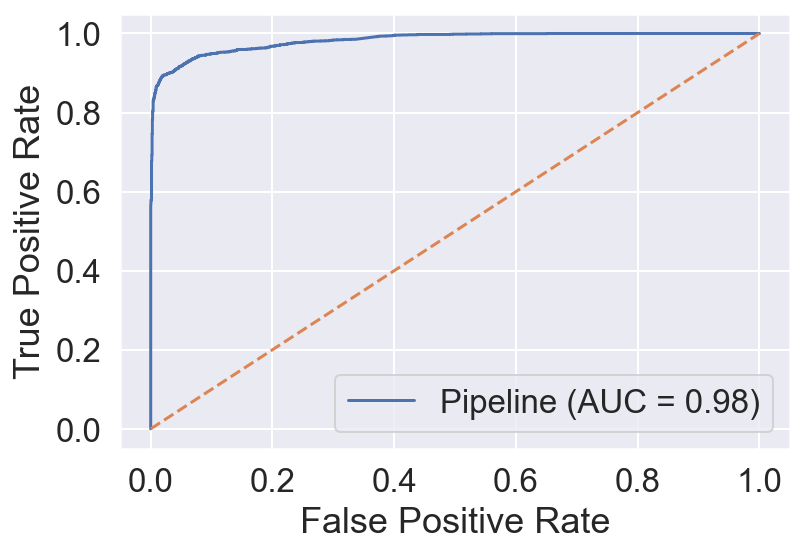

In [59]:
# Plots the ROC curve and visualizes the AUC score
plot_roc_curve(pipe, X_test, y_test)
plt.plot([0,1],[0,1], label='baseline', linestyle='--');

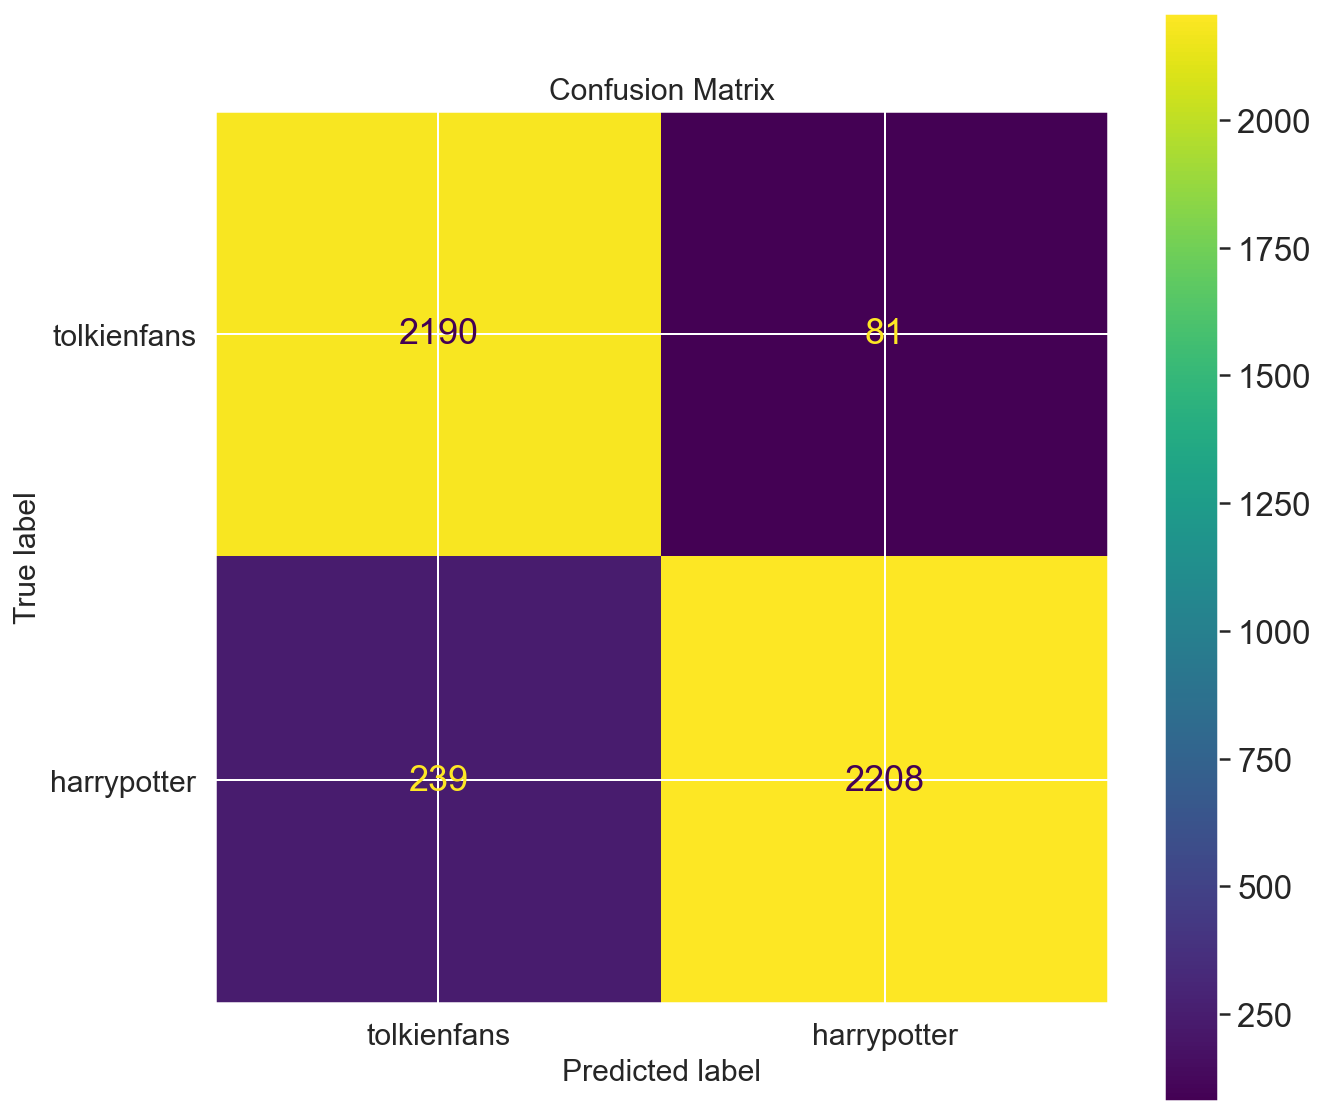

In [62]:
# Creates the confusion matrix and saves it as an image
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(10, 10))
plot = ConfusionMatrixDisplay(cm).plot(ax=ax)
plot
plt.title('Confusion Matrix')
ax.set_title('Confusion Matrix', fontdict={'size':'15'})
ax.set_xticklabels(df['subreddit'].unique(), size=15);
ax.set_yticklabels(df['subreddit'].unique(), size=15);
ax.set_xlabel('Predicted label', fontdict={'size':'15'})
ax.set_ylabel('True label', fontdict={'size':'15'})

plt.savefig('../../presentation/imgs/no_names_cm_rf_tfidf_stem.jpg')

In [64]:
# dir(pipe.named_steps['rf'])

In [65]:
# Finds the features importances from the pipeline through the random forest model
importances = pipe.named_steps['rf'].feature_importances_

In [66]:
importances

array([1.35692660e-05, 1.01122323e-04, 9.77452518e-05, ...,
       2.80587670e-04, 3.53475636e-04, 2.39320960e-04])

In [67]:
# Finds the feature names in the pipeline through the TfidfVectorizer
names = pipe.named_steps['tvec'].get_feature_names()

In [68]:
# Creates the feature importance dataframe and shows the top 10 features
importance_dict = pd.DataFrame({'feature_importance': importances,
                                'features': names})
top10 = importance_dict.nlargest(10, columns=['feature_importance'])
top10

,feature_importance,features
1486,0.043373,ring
854,0.041138,hobbit
1579,0.031412,silmarillion
1519,0.026830,sauron
1126,0.024133,middl earth
856,0.024086,hogwart
1125,0.021597,middl
522,0.020671,earth
544,0.019805,elv
508,0.017739,dumbledor


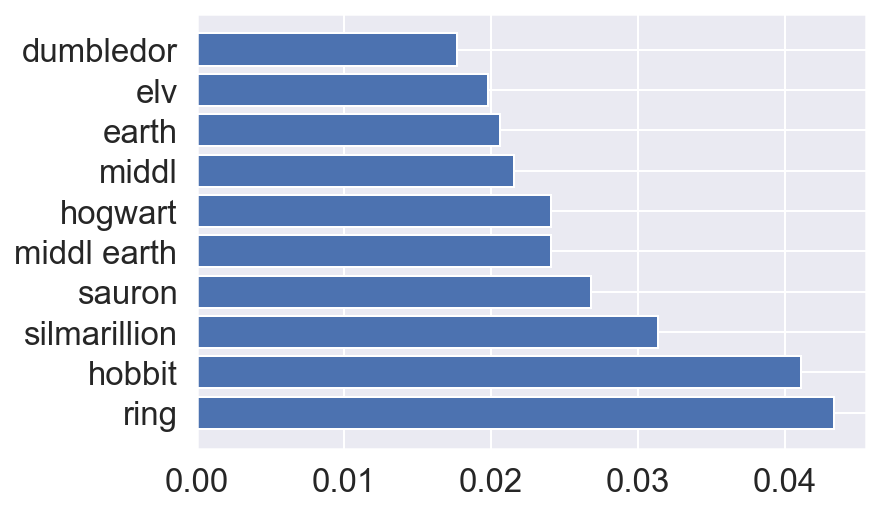

In [71]:
# Visualizes the top 10 features

# plt.bar(x='features', height='feature_importances', data=top10);
plt.barh(top10['features'], top10['feature_importance']);
plt.savefig('../../presentation/imgs/no_names_rf_tfidf_stem_featureImp.jpg')

## Naive Bayes Multinomial Model

In [5]:
# Load the data
df = pd.read_csv('../../data/clean_data/clean_posts_no_names.csv', index_col=0)
df.head()

,subreddit,title,created_utc,selftext,title_selftext,author,media_only,permalink,text_length,clean_text_stem,clean_text_lem
0,tolkienfans,What happened to Tolkien’s Red Book?,1616977706,I was wondering if somebody could clear up my ...,what happened to tolkien s red book i was wond...,lukeskinwalker69epic,False,/r/tolkienfans/comments/mfdrms/what_happened_t...,322,happen red book wonder somebodi could clear co...,happened red book wondering somebody could cle...
1,tolkienfans,What Makes People Turn Invisible When the Put ...,1616971688,I guess this is a big question because I never...,what makes people turn invisible when the put ...,Jpmaniax26,False,/r/tolkienfans/comments/mfbzjh/what_makes_peop...,252,make peopl turn invis put one ring guess big q...,make people turn invisible put one ring guess ...
2,tolkienfans,"Theory: At some point not told in the Tale, Ar...",1616971077,This is the last dialogue between Queen Undómi...,theory at some point not told in the tale arag...,yew_eater,False,/r/tolkienfans/comments/mfbsks/theory_at_some_...,6045,theori point told tale aragorn arwen must seri...,theory point told tale aragorn arwen must seri...
3,tolkienfans,I’d like to purchase a matching set of books o...,1616969977,Can anyone help me out? Looking for matching b...,i d like to purchase a matching set of books o...,GoosePants72,False,/r/tolkienfans/comments/mfbfyj/id_like_to_purc...,302,like purchas match set book everyth silmarilli...,like purchase matching set book everything sil...
4,tolkienfans,"When Faramir ‘proposes’ to Eowyn, something we...",1616966528,After he confesses his love for her and talks ...,when faramir proposes to eowyn something weird...,PhendranaDrifter,False,/r/tolkienfans/comments/mfaae8/when_faramir_pr...,731,faramir propos eowyn someth weird happen confe...,faramir proposes eowyn something weird happens...


In [6]:
# Checks baseline
df['subreddit'].value_counts(normalize=True)
# df['subreddit'].value_counts()

tolkienfans    0.518758
harrypotter    0.481242
Name: subreddit, dtype: float64

In [7]:
# Samples 100 observations in case I want to use a smaller dataset
df_sample = df.sample(100, random_state=42)

In [8]:
# Set up X and y
# X = df_sample['clean_text_stem']
# y = df_sample['subreddit']

X = df['clean_text_stem']
y = df['subreddit']

In [9]:
# Splits the data into training and test sets from sample
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

In [10]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('cvec', CountVectorizer(max_df=0.9, max_features=5000, min_df=2, ngram_range=(1,2))),
    ('nb', MultinomialNB())
])

In [11]:
# best estimators:
# {'cvec__max_df': 0.9,
#  'cvec__max_features': 5000,
#  'cvec__min_df': 2,
#  'cvec__ngram_range': (1, 2)}

In [12]:
# Fits the data to the pipeline including CountVectorizer and Multinomial Naive Bayes
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=5000, min_df=2,
                                 ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

In [13]:
# Returns the training and testing accuracy scores
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9523809523809523, 0.9506146672318779)

#### Evaluation

In [14]:
# Assigns variable names to the pipe training and testing accuracy scores
train1, test1 = pipe.score(X_train, y_train), pipe.score(X_test, y_test)
train1, test1

(0.9523809523809523, 0.9506146672318779)

In [15]:
# Calculates the y predictions and the AUC score
y_preds = pipe.predict(X_test)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])

In [16]:
# Creates the model metrics row dataframe to be added to the final model metrics table in the presentation, and saves it as a csv file
results = pd.DataFrame({'Model': ['MultinomialNB'], 
                        'Transformer': ['CountVectorizer'],
                        'Stemmed/Lemmed': ['Stemmed'],
                        'Train_acc': [train1],
                        'Test_acc': [test1], 
                        'AUC': [auc]})
results.to_csv('../../data/result_scores/no_names_nb_countvect_stem.csv')

In [17]:
results

,Model,Transformer,Stemmed/Lemmed,Train_acc,Test_acc,AUC
0,MultinomialNB,CountVectorizer,Stemmed,0.952381,0.950615,0.991785


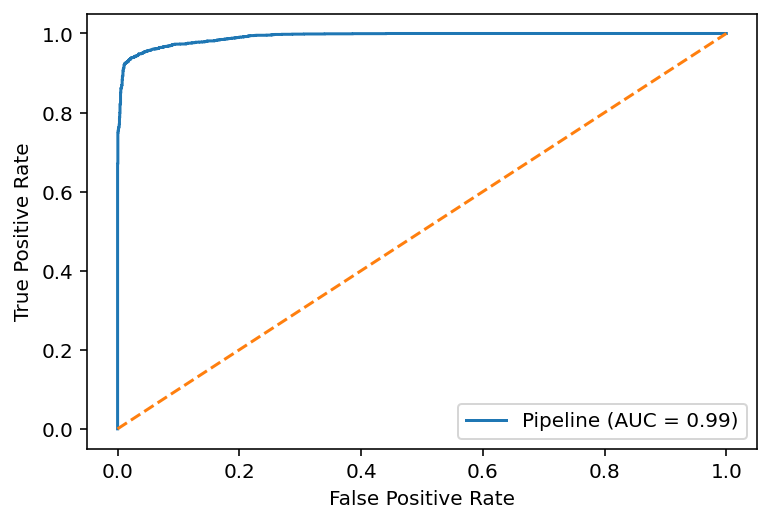

In [18]:
# Plots the ROC curve and visualizes the AUC score
plot_roc_curve(pipe, X_test, y_test)
plt.plot([0,1],[0,1], label='baseline', linestyle='--');

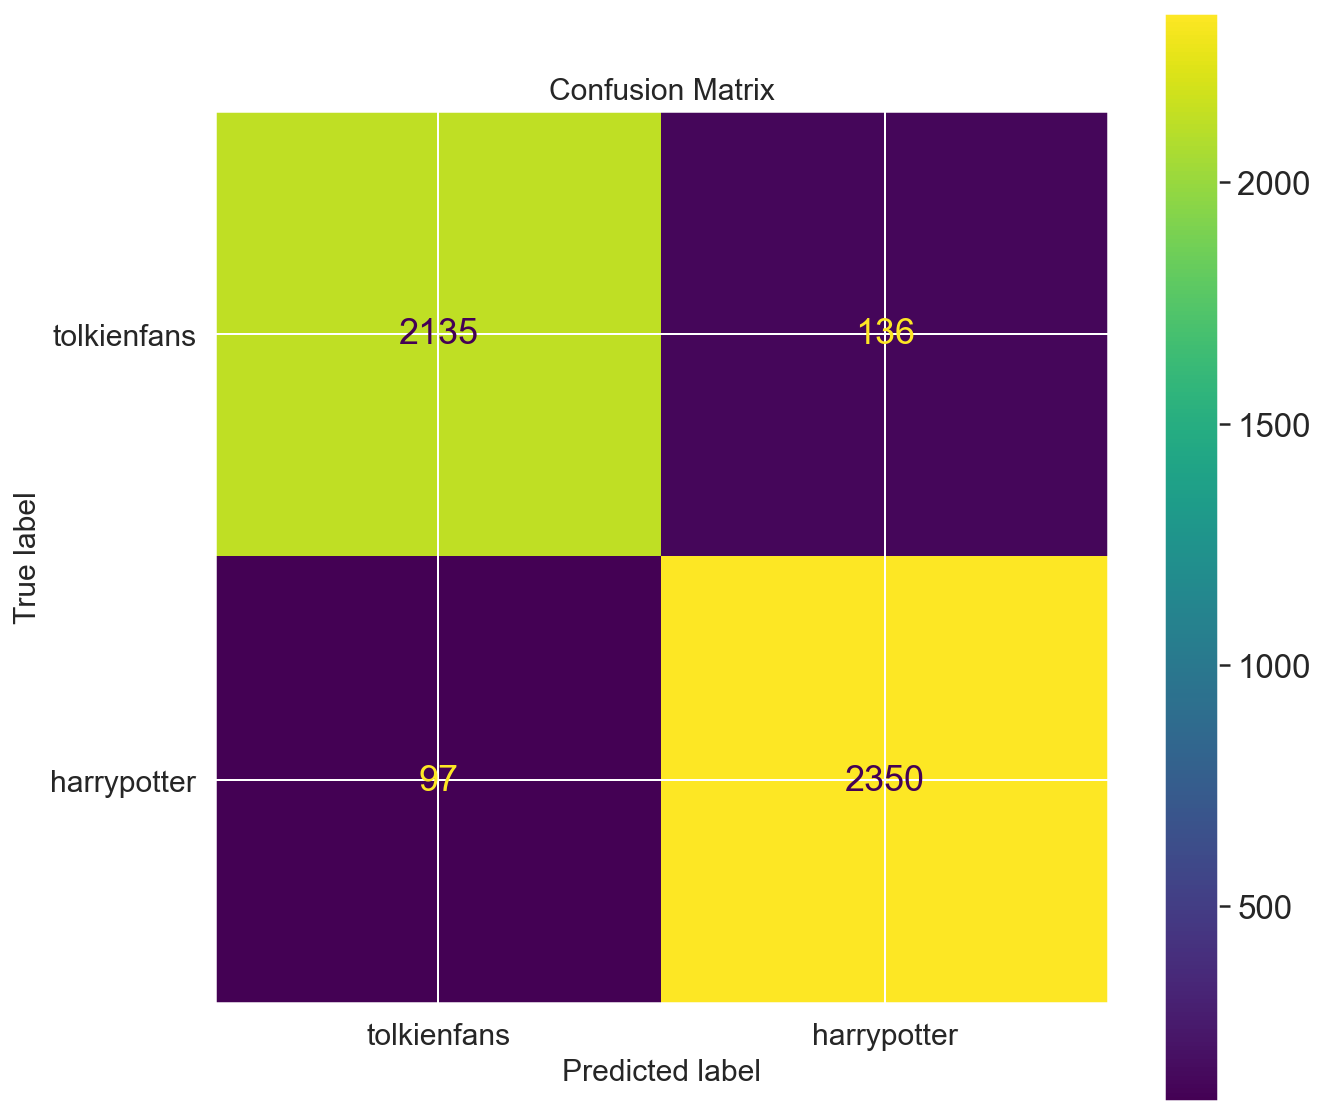

In [19]:
# Creates the confusion matrix and saves it as an image
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(10, 10))
plot = ConfusionMatrixDisplay(cm).plot(ax=ax)
plot
plt.title('Confusion Matrix')
ax.set_title('Confusion Matrix', fontdict={'size':'15'})
ax.set_xticklabels(df['subreddit'].unique(), size=15);
ax.set_yticklabels(df['subreddit'].unique(), size=15);
ax.set_xlabel('Predicted label', fontdict={'size':'15'})
ax.set_ylabel('True label', fontdict={'size':'15'})

plt.savefig('../../presentation/imgs/no_names_cm_nb_countvect_stem.jpg')

In [20]:
# Creates the coef dictionary dataframe and shows the 10 smallest coefficients
coefs = pipe.named_steps['nb'].coef_
coefs = coefs.ravel()

names = pipe.named_steps['cvec'].get_feature_names()

coef_dict = pd.DataFrame({'coefs': coefs,
                      'features': pd.Series(names)})
coef_dict.nsmallest(10, columns=['coefs'])

,coefs,features
65,-13.048484,5th year
74,-13.048484,9d
75,-13.048484,9d 95
77,-13.048484,aberforth
108,-13.048484,action tv
160,-13.048484,alan rickman
162,-13.048484,albu
163,-13.048484,albu dumbledor
228,-13.048484,amortentia
231,-13.048484,amp auto


In [21]:
# Displays the 10 largest coefficients
coef_dict.nlargest(10, columns=['coefs'])

,coefs,features
4874,-4.675392,would
3682,-4.722694,ring
3495,-4.834019,read
2517,-4.915190,like
3070,-4.983219,one
557,-5.094463,book
2393,-5.134963,know
3782,-5.205420,sauron
4333,-5.257788,think
1283,-5.329799,earth


## Logistic Regression Model: Tfidf, Stemmed

In [22]:
# Load the data
df = pd.read_csv('../../data/clean_data/clean_posts_no_names.csv', index_col=0)
df.head()

,subreddit,title,created_utc,selftext,title_selftext,author,media_only,permalink,text_length,clean_text_stem,clean_text_lem
0,tolkienfans,What happened to Tolkien’s Red Book?,1616977706,I was wondering if somebody could clear up my ...,what happened to tolkien s red book i was wond...,lukeskinwalker69epic,False,/r/tolkienfans/comments/mfdrms/what_happened_t...,322,happen red book wonder somebodi could clear co...,happened red book wondering somebody could cle...
1,tolkienfans,What Makes People Turn Invisible When the Put ...,1616971688,I guess this is a big question because I never...,what makes people turn invisible when the put ...,Jpmaniax26,False,/r/tolkienfans/comments/mfbzjh/what_makes_peop...,252,make peopl turn invis put one ring guess big q...,make people turn invisible put one ring guess ...
2,tolkienfans,"Theory: At some point not told in the Tale, Ar...",1616971077,This is the last dialogue between Queen Undómi...,theory at some point not told in the tale arag...,yew_eater,False,/r/tolkienfans/comments/mfbsks/theory_at_some_...,6045,theori point told tale aragorn arwen must seri...,theory point told tale aragorn arwen must seri...
3,tolkienfans,I’d like to purchase a matching set of books o...,1616969977,Can anyone help me out? Looking for matching b...,i d like to purchase a matching set of books o...,GoosePants72,False,/r/tolkienfans/comments/mfbfyj/id_like_to_purc...,302,like purchas match set book everyth silmarilli...,like purchase matching set book everything sil...
4,tolkienfans,"When Faramir ‘proposes’ to Eowyn, something we...",1616966528,After he confesses his love for her and talks ...,when faramir proposes to eowyn something weird...,PhendranaDrifter,False,/r/tolkienfans/comments/mfaae8/when_faramir_pr...,731,faramir propos eowyn someth weird happen confe...,faramir proposes eowyn something weird happens...


In [23]:
# Checks baseline
df['subreddit'].value_counts(normalize=True)
# df['subreddit'].value_counts()

tolkienfans    0.518758
harrypotter    0.481242
Name: subreddit, dtype: float64

In [25]:
# Samples 100 observations if I want to use a smaller dataset for training
df_sample = df.sample(100, random_state=42)

In [26]:
# Set up X and y
# X = df_sample['clean_text_stem']
# y = df_sample['subreddit']

X = df['clean_text_stem']
y = df['subreddit']

In [27]:
# Splits the data into training and test sets from sample
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

In [28]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_df=0.9, max_features=5000, min_df=1, ngram_range=(1,2))),
    ('logreg', LogisticRegression())
])

In [29]:
# best estimators:
# {'logreg__C': 1,
#  'tvec__max_df': 0.9,
#  'tvec__max_features': 5000,
#  'tvec__min_df': 1,
#  'tvec__ngram_range': (1, 2)}

In [30]:
# Fits the data to the pipeline including the TfidfVectorizer and the Logistic Regression
pipe.fit(X_train, y_train)

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.9, max_features=5000,
                                 ngram_range=(1, 2))),
                ('logreg', LogisticRegression())])

In [31]:
# Returns the training and testing accuracy scores from the pipeline
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9711742263671047, 0.9557015684612123)

### Evaluation

In [33]:
# Assigns variables names to the pipe training and testing accuracy scores
train1, test1 = pipe.score(X_train, y_train), pipe.score(X_test, y_test)
train1, test1

(0.9711742263671047, 0.9557015684612123)

In [34]:
# Calculates the y predictions and the AUC score
y_preds = pipe.predict(X_test)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])

In [35]:
# Creates the model metrics row dataframe and saves it as a csv to be added to the final model metrics table in the presentation
results = pd.DataFrame({'Model': ['Logistic'], 
                        'Transformer': ['TFIDF'],
                        'Stemmed/Lemmed': ['Stemmed'],
                        'Train_acc': [train1],
                        'Test_acc': [test1], 
                        'AUC': [auc]})
results.to_csv('../../data/result_scores/no_names_logreg_tfidf_stem.csv')

In [36]:
results

,Model,Transformer,Stemmed/Lemmed,Train_acc,Test_acc,AUC
0,Logistic,TFIDF,Stemmed,0.971174,0.955702,0.992427


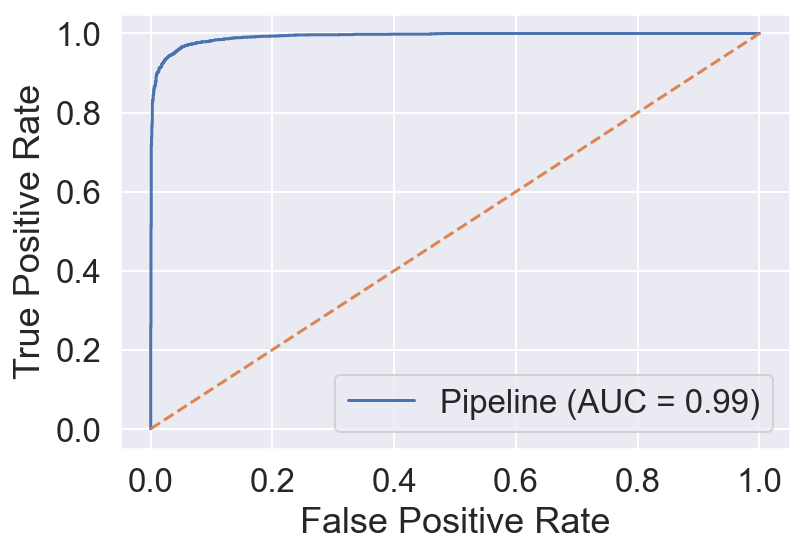

In [37]:
# Plots the ROC curve and visualizes the AUC score
plot_roc_curve(pipe, X_test, y_test)
plt.plot([0,1],[0,1], label='baseline', linestyle='--');

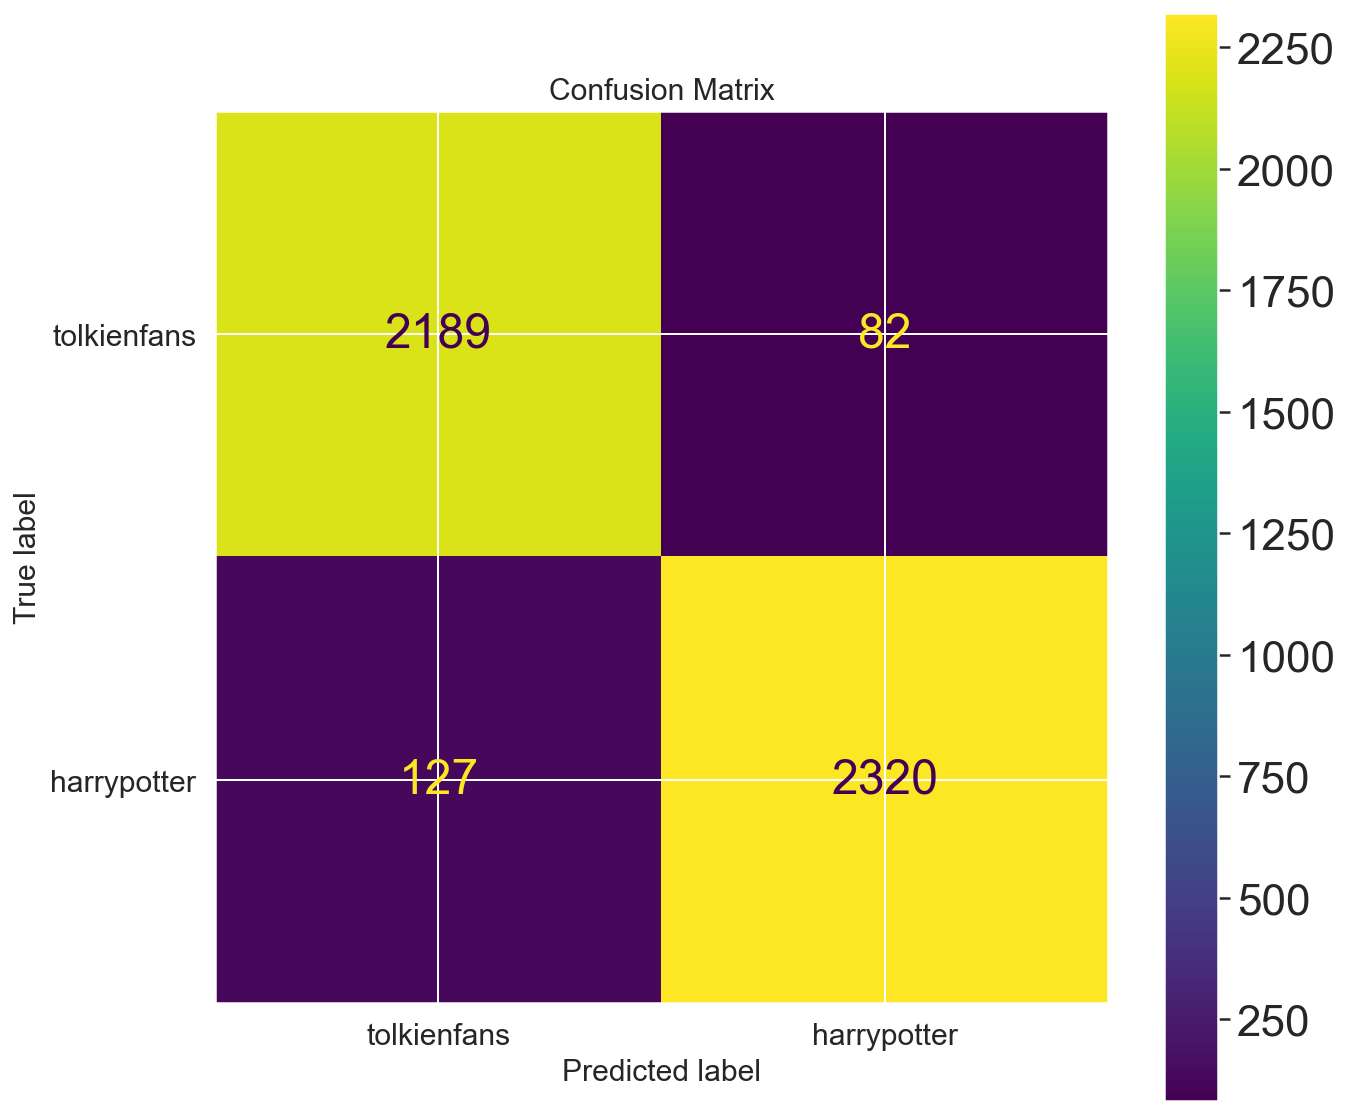

In [38]:
# Creates the confusion matrix and saves it as an image
sns.set(font_scale=2.0)
cm = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(10, 10))
plot = ConfusionMatrixDisplay(cm).plot(ax=ax)
plot
plt.title('Confusion Matrix')
ax.set_title('Confusion Matrix', fontdict={'size':'15'})
ax.set_xticklabels(df['subreddit'].unique(), size=15);
ax.set_yticklabels(df['subreddit'].unique(), size=15);
ax.set_xlabel('Predicted label', fontdict={'size':'15'})
ax.set_ylabel('True label', fontdict={'size':'15'})

plt.savefig('../../presentation/imgs/no_names_cm_logreg_tfidf_stem.jpg')

In [39]:
# Creates the coef dictionary dataframe and shows the 10 smallest coefficients
coefs = pipe.named_steps['logreg'].coef_
coefs = coefs.ravel()

names = pipe.named_steps['tvec'].get_feature_names()

coef_dict = pd.DataFrame({'coefs': coefs,
                          'features': pd.Series(names)})
coef_dict.nsmallest(10, columns=['coefs'])

,coefs,features
2094,-5.994882,hogwart
4678,-5.421240,voldemort
1242,-5.043886,dumbledor
4023,-4.740321,snape
2046,-4.672461,hermion
4832,-4.224682,wizard
4696,-3.617568,wand
3983,-3.520462,siriu
3730,-3.452524,ron
3873,-3.303405,seri


In [40]:
# shows the 10 largest coefficients
coef_dict.nlargest(10, columns=['coefs'])

,coefs,features
2083,8.181247,hobbit
3681,6.871067,ring
3960,6.327872,silmarillion
3781,5.335286,sauron
1339,4.790458,elv
1284,4.500190,earth
2792,4.261726,middl earth
2857,3.848599,morgoth
1748,3.828539,frodo
2791,3.806508,middl


## AdaBoost Modeling: Countvect, Stemmed

In [41]:
# Load the data
df = pd.read_csv('../../data/clean_data/clean_posts_no_names.csv', index_col=0)
df.head()

,subreddit,title,created_utc,selftext,title_selftext,author,media_only,permalink,text_length,clean_text_stem,clean_text_lem
0,tolkienfans,What happened to Tolkien’s Red Book?,1616977706,I was wondering if somebody could clear up my ...,what happened to tolkien s red book i was wond...,lukeskinwalker69epic,False,/r/tolkienfans/comments/mfdrms/what_happened_t...,322,happen red book wonder somebodi could clear co...,happened red book wondering somebody could cle...
1,tolkienfans,What Makes People Turn Invisible When the Put ...,1616971688,I guess this is a big question because I never...,what makes people turn invisible when the put ...,Jpmaniax26,False,/r/tolkienfans/comments/mfbzjh/what_makes_peop...,252,make peopl turn invis put one ring guess big q...,make people turn invisible put one ring guess ...
2,tolkienfans,"Theory: At some point not told in the Tale, Ar...",1616971077,This is the last dialogue between Queen Undómi...,theory at some point not told in the tale arag...,yew_eater,False,/r/tolkienfans/comments/mfbsks/theory_at_some_...,6045,theori point told tale aragorn arwen must seri...,theory point told tale aragorn arwen must seri...
3,tolkienfans,I’d like to purchase a matching set of books o...,1616969977,Can anyone help me out? Looking for matching b...,i d like to purchase a matching set of books o...,GoosePants72,False,/r/tolkienfans/comments/mfbfyj/id_like_to_purc...,302,like purchas match set book everyth silmarilli...,like purchase matching set book everything sil...
4,tolkienfans,"When Faramir ‘proposes’ to Eowyn, something we...",1616966528,After he confesses his love for her and talks ...,when faramir proposes to eowyn something weird...,PhendranaDrifter,False,/r/tolkienfans/comments/mfaae8/when_faramir_pr...,731,faramir propos eowyn someth weird happen confe...,faramir proposes eowyn something weird happens...


In [42]:
# Checks baseline
df['subreddit'].value_counts(normalize=True)
# df['subreddit'].value_counts()

tolkienfans    0.518758
harrypotter    0.481242
Name: subreddit, dtype: float64

In [43]:
# Samples 100 observations in case I want to work with a smaller dataset when training
df_sample = df.sample(100, random_state=42)

In [44]:
# Set up X and y
# X = df_sample['clean_text_stem']
# y = df_sample['subreddit']

X = df['clean_text_stem']
y = df['subreddit']

In [45]:
# Splits the data into training and test sets from sample
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

In [46]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('cvec', CountVectorizer(max_df=0.9, max_features=5000, min_df=2, ngram_range=(1,2))),
    ('abc', AdaBoostClassifier(n_estimators=250))
])

In [47]:
# best estimators:
# {'abc__n_estimators': 250,
#  'cvec__max_df': 0.9,
#  'cvec__max_features': 5000,
#  'cvec__min_df': 2,
#  'cvec__ngram_range': (1, 2)}

In [48]:
# Fits the data to the pipeline including the Countvectorizer and the AdaBoost Classifier
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=5000, min_df=2,
                                 ngram_range=(1, 2))),
                ('abc', AdaBoostClassifier(n_estimators=250))])

In [49]:
# Returns the training and test accuracy scores from the pipeline
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9494842447364703, 0.9387452310300975)

#### Evaluation

In [51]:
# Returns the training and testing accuracy scores and sets them to variable names
train1, test1 = pipe.score(X_train, y_train), pipe.score(X_test, y_test)
train1, test1

(0.9494842447364703, 0.9387452310300975)

In [52]:
# Calculates the y predictions and the AUC score
y_preds = pipe.predict(X_test)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])

In [53]:
# Creates the model metrics row dataframe and saves it as a csv to be used for the final metrics table in the presentation
results = pd.DataFrame({'Model': ['AdaBoost'], 
                        'Transformer': ['CountVect'],
                        'Stemmed/Lemmed': ['Stemmed'],
                        'Train_acc': [train1],
                        'Test_acc': [test1], 
                        'AUC': [auc]})
results.to_csv('../../data/result_scores/no_names_boost_countvect_stem.csv')

In [54]:
results

,Model,Transformer,Stemmed/Lemmed,Train_acc,Test_acc,AUC
0,AdaBoost,CountVect,Stemmed,0.949484,0.938745,0.986431


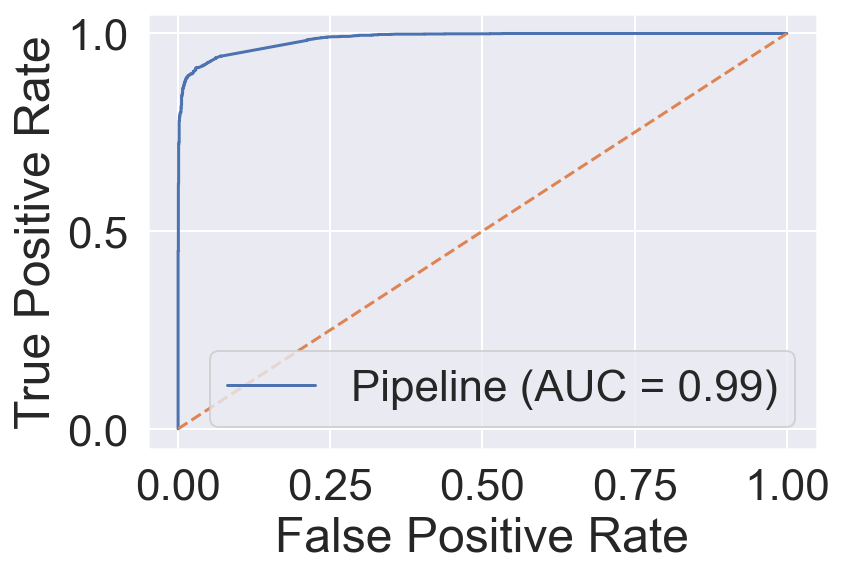

In [55]:
# Plots the ROC Curve and visualizes the AUC score
plot_roc_curve(pipe, X_test, y_test)
plt.plot([0,1],[0,1], label='baseline', linestyle='--');

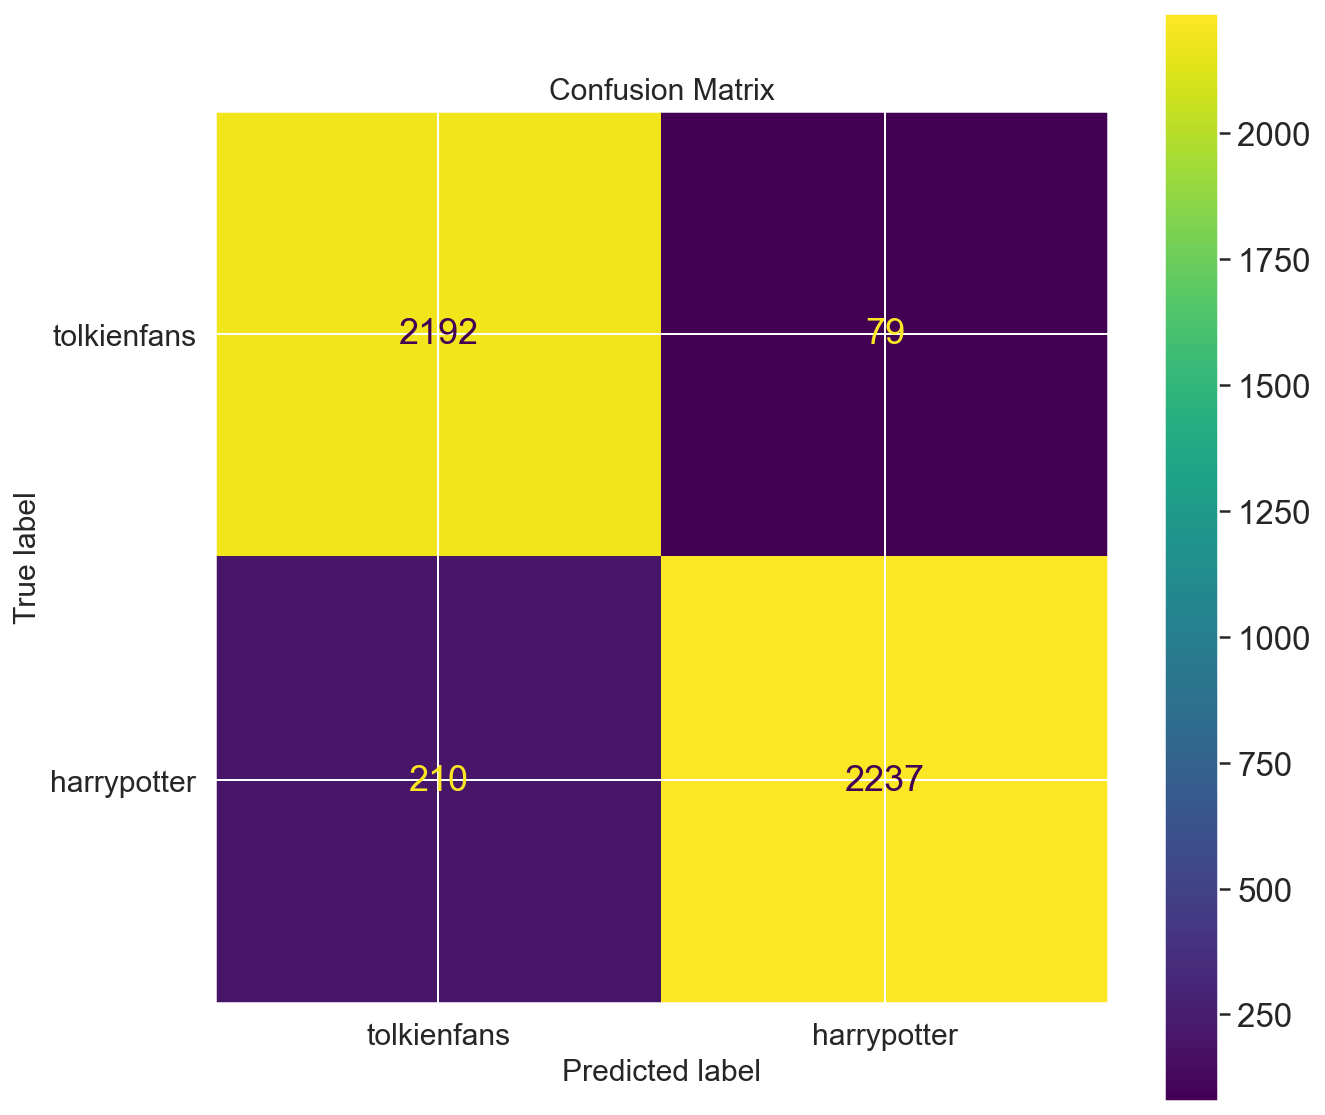

In [56]:
# Creates the confusion matrix and saves it as an image"
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(10, 10))
plot = ConfusionMatrixDisplay(cm).plot(ax=ax)
plot
plt.title('Confusion Matrix')
ax.set_title('Confusion Matrix', fontdict={'size':'15'})
ax.set_xticklabels(df['subreddit'].unique(), size=15);
ax.set_yticklabels(df['subreddit'].unique(), size=15);
ax.set_xlabel('Predicted label', fontdict={'size':'15'})
ax.set_ylabel('True label', fontdict={'size':'15'})

plt.savefig('../../presentation/imgs/no_names_cm_boost_countvect_stem.jpg')

In [154]:
dir(pipe.named_steps['abc'])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_boost',
 '_boost_discrete',
 '_boost_real',
 '_check_X',
 '_check_n_features',
 '_compute_proba_from_decision',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_validate_data',
 '_validate_estimator',
 'algorithm',
 'base_estimator',
 'base_estimator_',
 'classes_',
 'decision_function',
 'estimator_errors_',
 'estimator_params',
 'estimator_weights_',
 'estimator

In [155]:
# Finds the feature importances in the pipeline through the AdaBoost Classifier
importances = pipe.named_steps['abc'].feature_importances_

In [156]:
importances

array([0., 0., 0., ..., 0., 0., 0.])

In [157]:
# Finds the feature names in the pipeline through the Countvectorizer 
names = pipe.named_steps['cvec'].get_feature_names()

In [158]:
# creates the feature importance dataframe and shows the top 10 features 
importance_dict = pd.DataFrame({'feature_importance': importances,
                                'features': names})
top10 = importance_dict.nlargest(10, columns=['feature_importance'])
top10

,feature_importance,features
4830,0.012,wizard
1000,0.008,curs
2085,0.008,hobbit
3682,0.008,ring
3962,0.008,silmarillion
4677,0.008,voldemort
35,0.004,2019
37,0.004,2021
99,0.004,accur
137,0.004,age


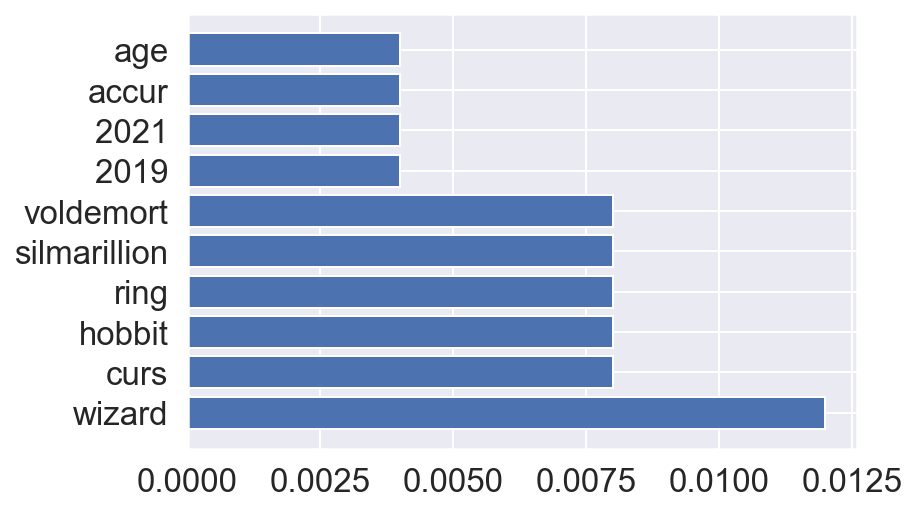

In [160]:
# Visualizes the feature importances 

# plt.bar(x='features', height='feature_importances', data=top10);
plt.barh(top10['features'], top10['feature_importance']);
plt.savefig('../../presentation/imgs/no_names_boost_countvect_stem_featureImp.jpg')